In [71]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import scipy.stats as st

from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt


***Clasificacion***

*Creacion de target*

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías:
alto, medio, bajo.

In [72]:
ds_clasificacion = pd.read_csv("properati_argentina_depurado.csv")

In [73]:
ds_clasificacion["precioxm2"] = (ds_clasificacion["property_price"]/ds_clasificacion["property_surface_total"]).round(2)
ds_clasificacion.drop(columns=["start_date", "end_date", "created_on", "property_title", "property_currency", "place_l2", "operation"], inplace=True)
ds_clasificacion.head(10)

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2
0,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,1429.31
1,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,1414.29
2,-34.610027,-58.401934,Once,Departamento,4.0,2.0,134.0,104.0,146000.0,1089.55
3,-34.631621,-58.416825,Boedo,PH,4.0,2.0,107.0,73.0,250000.0,2336.45
4,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.0,46.0,100000.0,1639.34
5,-34.625588,-58.423056,Boedo,PH,4.0,2.0,104.0,54.0,185000.0,1778.85
6,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.0,44.0,100000.0,1612.90
7,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.0,55.0,185000.0,3135.59
8,-34.626595,-58.420019,Boedo,PH,4.0,3.0,111.0,101.0,110000.0,990.99
9,-34.630538,-58.419221,Boedo,Departamento,3.0,2.0,50.0,50.0,95000.0,1900.00


Igual Frecuencia

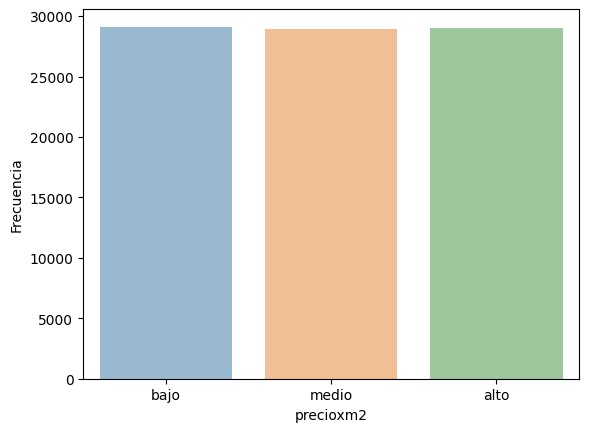

In [74]:
labels=["bajo","medio","alto"]

ds_clasificacion["precioxm2_igual_frec"]=pd.qcut(ds_clasificacion["precioxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

Por cuantiles

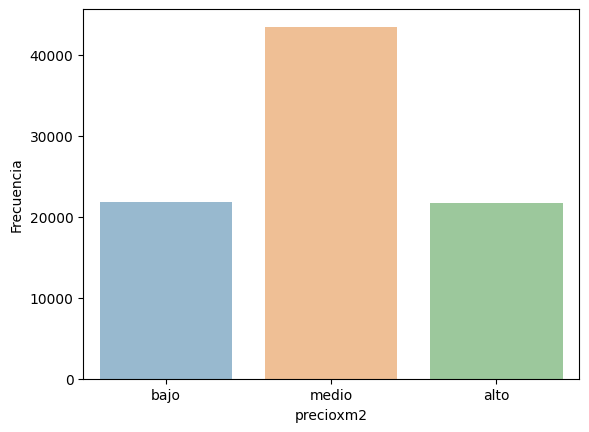

In [75]:
labels=["bajo","medio","alto"]
ds_clasificacion["precioxm2_q"]=pd.qcut(ds_clasificacion["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

Por viviendas

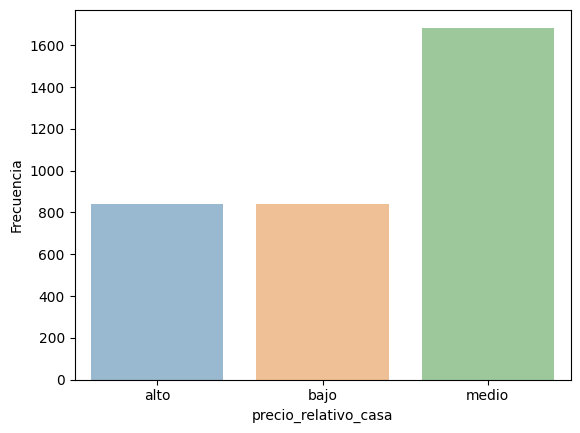

In [76]:
ds_clasificacion["precioxm2_relativo_q"] = np.nan
labels=["bajo","medio","alto"]
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Casa", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Casa"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Departamento", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Departamento"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "PH", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "PH"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion[ds_clasificacion["property_type"] == "Casa"].groupby(['precioxm2_relativo_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precio_relativo_casa')
plt.show()

In [77]:
# labels=["bajo","medio","alto"]
# ds_clasificacion["precio_recorrido_discret_q_libres_PH"]=pd.cut(ds_clasificacion["precioxm2"],bins=3, labels=labels)

# #Gráfico de barras con Seaborn
# ds_agrupado_precioxm2=ds_clasificacion.groupby(['precio_recorrido_discret_q_libres_PH']).count()  #Calculo la frecuencia de cada categoría

# eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
# eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

# sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2_PH')
# plt.show()

distribuicion de precios

<AxesSubplot: >

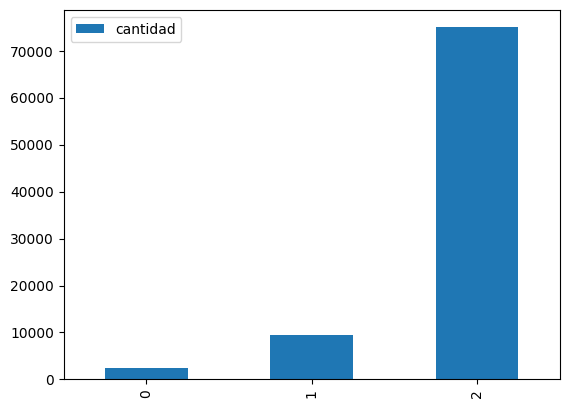

In [78]:
precio_bajo = (ds_clasificacion[ds_clasificacion["precioxm2"]<1000]).shape[0]
precio_medio = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1000]).shape[0] - (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]
precio_alto = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]

df_precios = pd.DataFrame(list(zip(["bajo","medio","alto"], [precio_bajo, precio_medio, precio_alto])), columns=["clasificacion", "cantidad"])
df_precios.plot.bar()

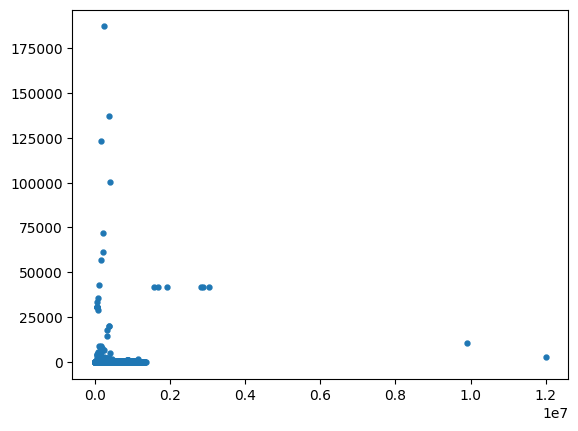

In [79]:
from sklearn.cluster import KMeans

#Generamos un dataset sintético
xy= ds_clasificacion[["property_price","property_surface_total"]]

plt.scatter(xy["property_price"], xy["property_surface_total"], s=50,marker='.')
plt.show()
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(xy) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(xy)



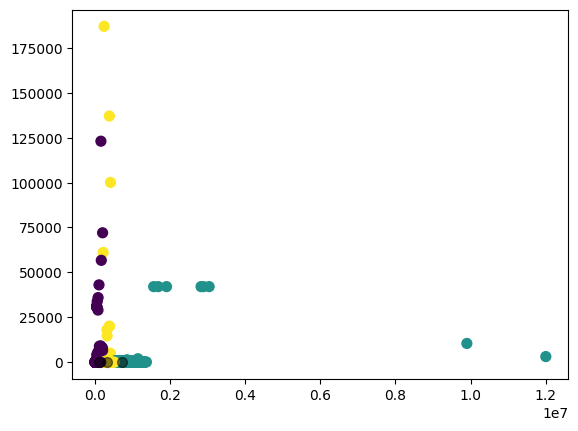

In [80]:
plt.scatter(xy["property_price"], xy["property_surface_total"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Viendo los resultados notamos que la clasificacion por clusters no es correspondiente a las anteriores clasificaciones ya que no es muy precisa al tomar en cuenta la superficie total

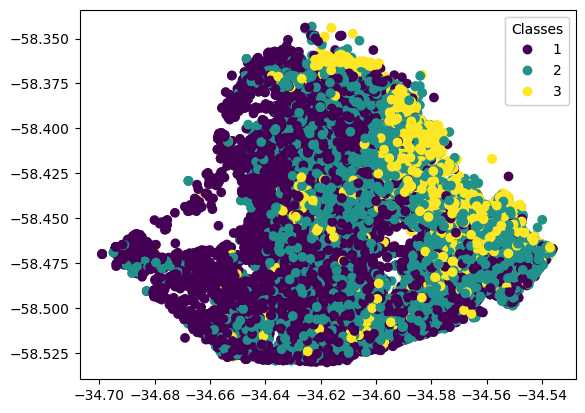

In [81]:
fig, ax = plt.subplots()
x=ds_clasificacion["latitud"]
y=ds_clasificacion["longitud"]
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "bajo",'color'] = 1
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "medio",'color'] = 2
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "alto",'color'] = 3

scatter = ax.scatter(x, y, c=ds_clasificacion['color'])
legend1 = ax.legend(*scatter.legend_elements(),
                     title="Classes")
ax.add_artist(legend1)
plt.show()

Como podemos observar, las viviendas de mayor valor se ubican en la zona este/norte de la ciudad, lo que es bastante coincidente a la realidad.

# **Entrenamiento y Predicción

Predeciccion del valor del atributo tipo_precio,

In [82]:
ds_clasificacion.isna().sum()

latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
precioxm2                   0
precioxm2_igual_frec        0
precioxm2_q                 0
precioxm2_relativo_q        0
color                       0
dtype: int64

In [83]:
#ds_clasificacion.drop()

In [84]:
ds_clasificacion.head(10)

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2,precioxm2_igual_frec,precioxm2_q,precioxm2_relativo_q,color
0,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,1429.31,bajo,bajo,bajo,1.0
1,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,1414.29,bajo,bajo,bajo,1.0
2,-34.610027,-58.401934,Once,Departamento,4.0,2.0,134.0,104.0,146000.0,1089.55,bajo,bajo,bajo,1.0
3,-34.631621,-58.416825,Boedo,PH,4.0,2.0,107.0,73.0,250000.0,2336.45,medio,medio,alto,2.0
4,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.0,46.0,100000.0,1639.34,bajo,bajo,medio,1.0
5,-34.625588,-58.423056,Boedo,PH,4.0,2.0,104.0,54.0,185000.0,1778.85,bajo,medio,medio,2.0
6,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.0,44.0,100000.0,1612.90,bajo,bajo,bajo,1.0
7,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.0,55.0,185000.0,3135.59,alto,alto,alto,3.0
8,-34.626595,-58.420019,Boedo,PH,4.0,3.0,111.0,101.0,110000.0,990.99,bajo,bajo,bajo,1.0
9,-34.630538,-58.419221,Boedo,Departamento,3.0,2.0,50.0,50.0,95000.0,1900.00,bajo,medio,medio,2.0


In [85]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [86]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [87]:
#dropeamos los que no sirven

C:\Users\ivanp\AppData\Local\Temp\ipykernel_11492\1191091085.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=ds_clasificacion.corr()


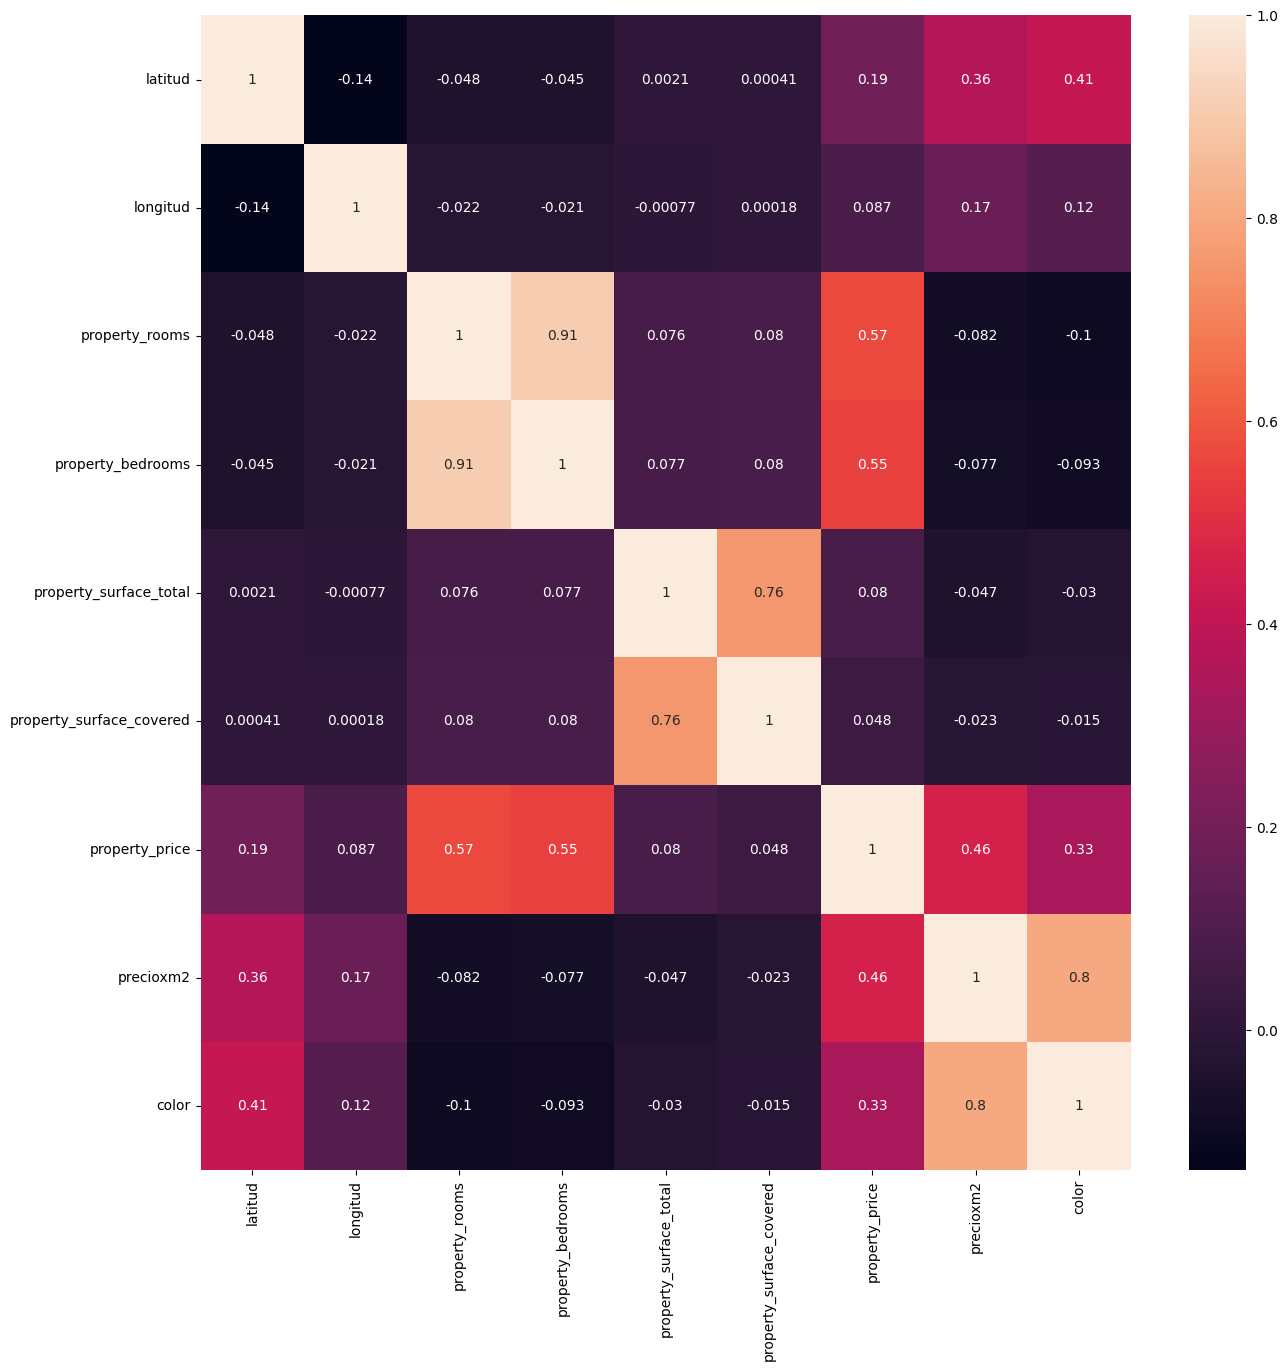

In [88]:
matriz_correlacion=ds_clasificacion.corr()

plt.figure(figsize=(15,15))
sns.heatmap(matriz_correlacion, annot = True)
plt.show()

In [89]:
ds_clasificacion

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2,precioxm2_igual_frec,precioxm2_q,precioxm2_relativo_q,color
0,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,1429.31,bajo,bajo,bajo,1.0
1,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,1414.29,bajo,bajo,bajo,1.0
2,-34.610027,-58.401934,Once,Departamento,4.0,2.0,134.0,104.0,146000.0,1089.55,bajo,bajo,bajo,1.0
3,-34.631621,-58.416825,Boedo,PH,4.0,2.0,107.0,73.0,250000.0,2336.45,medio,medio,alto,2.0
4,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.0,46.0,100000.0,1639.34,bajo,bajo,medio,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87026,-34.603245,-58.489810,Villa del Parque,Departamento,4.0,3.0,130.0,100.0,220000.0,1692.31,bajo,bajo,bajo,1.0
87027,-34.614063,-58.482814,Villa del Parque,Departamento,3.0,2.0,68.0,60.0,161000.0,2367.65,medio,medio,medio,2.0
87028,-34.614175,-58.479062,Villa del Parque,Departamento,1.0,1.0,51.0,30.0,75500.0,1480.39,bajo,bajo,bajo,1.0
87029,-34.614175,-58.479062,Villa del Parque,Departamento,1.0,1.0,37.0,31.0,74500.0,2013.51,medio,medio,medio,2.0


In [90]:
features=['property_rooms','property_bedrooms','property_surface_total','property_surface_covered','latitud','longitud']
          
target='precioxm2_q'

In [91]:
#Verifico balanceo de clases
ds_clasificacion[target].value_counts(normalize=True)*100 #capaz tendriamos que tomar uno que este mas balanceado

medio    49.969551
bajo     25.039354
alto     24.991095
Name: precioxm2_q, dtype: float64

In [92]:
x_train, x_test, y_train, y_test = train_test_split(ds_clasificacion[features].values, 
                                                   ds_clasificacion[target].values, 
                                                   test_size=0.2,    #20% al conjunto de test
                                                   random_state=0,  #para poder reproducir el experimento
                                                   stratify=ds_clasificacion[target].values) #estratificado para mantener proporcion
#print('# Datos Entrenamiento: {}'.format(len(x_train)))
#print('# Datos Prueba: {}'.format(len(x_test)))
#for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
#  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

In [93]:
print(y_test)

['medio', 'alto', 'bajo', 'medio', 'alto', ..., 'medio', 'alto', 'medio', 'medio', 'medio']
Length: 17407
Categories (3, object): ['bajo' < 'medio' < 'alto']


In [94]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from ensurepip import bootstrap
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,f1_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier



#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': list(range(12,20)),
               'ccp_alpha':np.linspace(0.001,0.005,n), 
               'max_depth':list(range(5,6))}
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.001     , 0.00144444, 0.00188889, 0.00233333, 0.00277778,
       0.00322222, 0.00366667, 0.00411111, 0.00455556, 0.005     ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [12, 13, 14, 15,
                                                              16, 17, 18, 19]},
                   scoring=make_scorer(f1_score, average=micro))

In [95]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0.001}
0.5979546932643327


In [96]:
randomcv.cv_results_['mean_test_score']

array([0.57724348, 0.59795469, 0.57129726, 0.59443584, 0.59795469,
       0.58777139, 0.59443584, 0.56664371, 0.57221647, 0.59443584])

In [97]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.0
property_rooms: 0.0
property_surface_covered: 0.03299738618936841
property_surface_total: 0.1990529535650979
longitud: 0.2441230335101578
latitud: 0.5238266267353758


In [98]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- latitud <= -34.60
|   |--- property_surface_total <= 86.50
|   |   |--- longitud <= -58.37
|   |   |   |--- latitud <= -34.64
|   |   |   |   |--- class: bajo
|   |   |   |--- latitud >  -34.64
|   |   |   |   |--- longitud <= -58.41
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- longitud >  -58.41
|   |   |   |   |   |--- class: medio
|   |   |--- longitud >  -58.37
|   |   |   |--- latitud <= -34.63
|   |   |   |   |--- class: bajo
|   |   |   |--- latitud >  -34.63
|   |   |   |   |--- class: alto
|   |--- property_surface_total >  86.50
|   |   |--- longitud <= -58.37
|   |   |   |--- property_surface_total <= 141.50
|   |   |   |   |--- property_surface_covered <= 75.50
|   |   |   |   |   |--- class: bajo
|   |   |   |   |--- property_surface_covered >  75.50
|   |   |   |   |   |--- class: bajo
|   |   |   |--- property_surface_total >  141.50
|   |   |   |   |--- class: bajo
|   |   |--- longitud >  -58.37
|   |   |   |--- latitud <= -34.62
|   |   |   |   |---

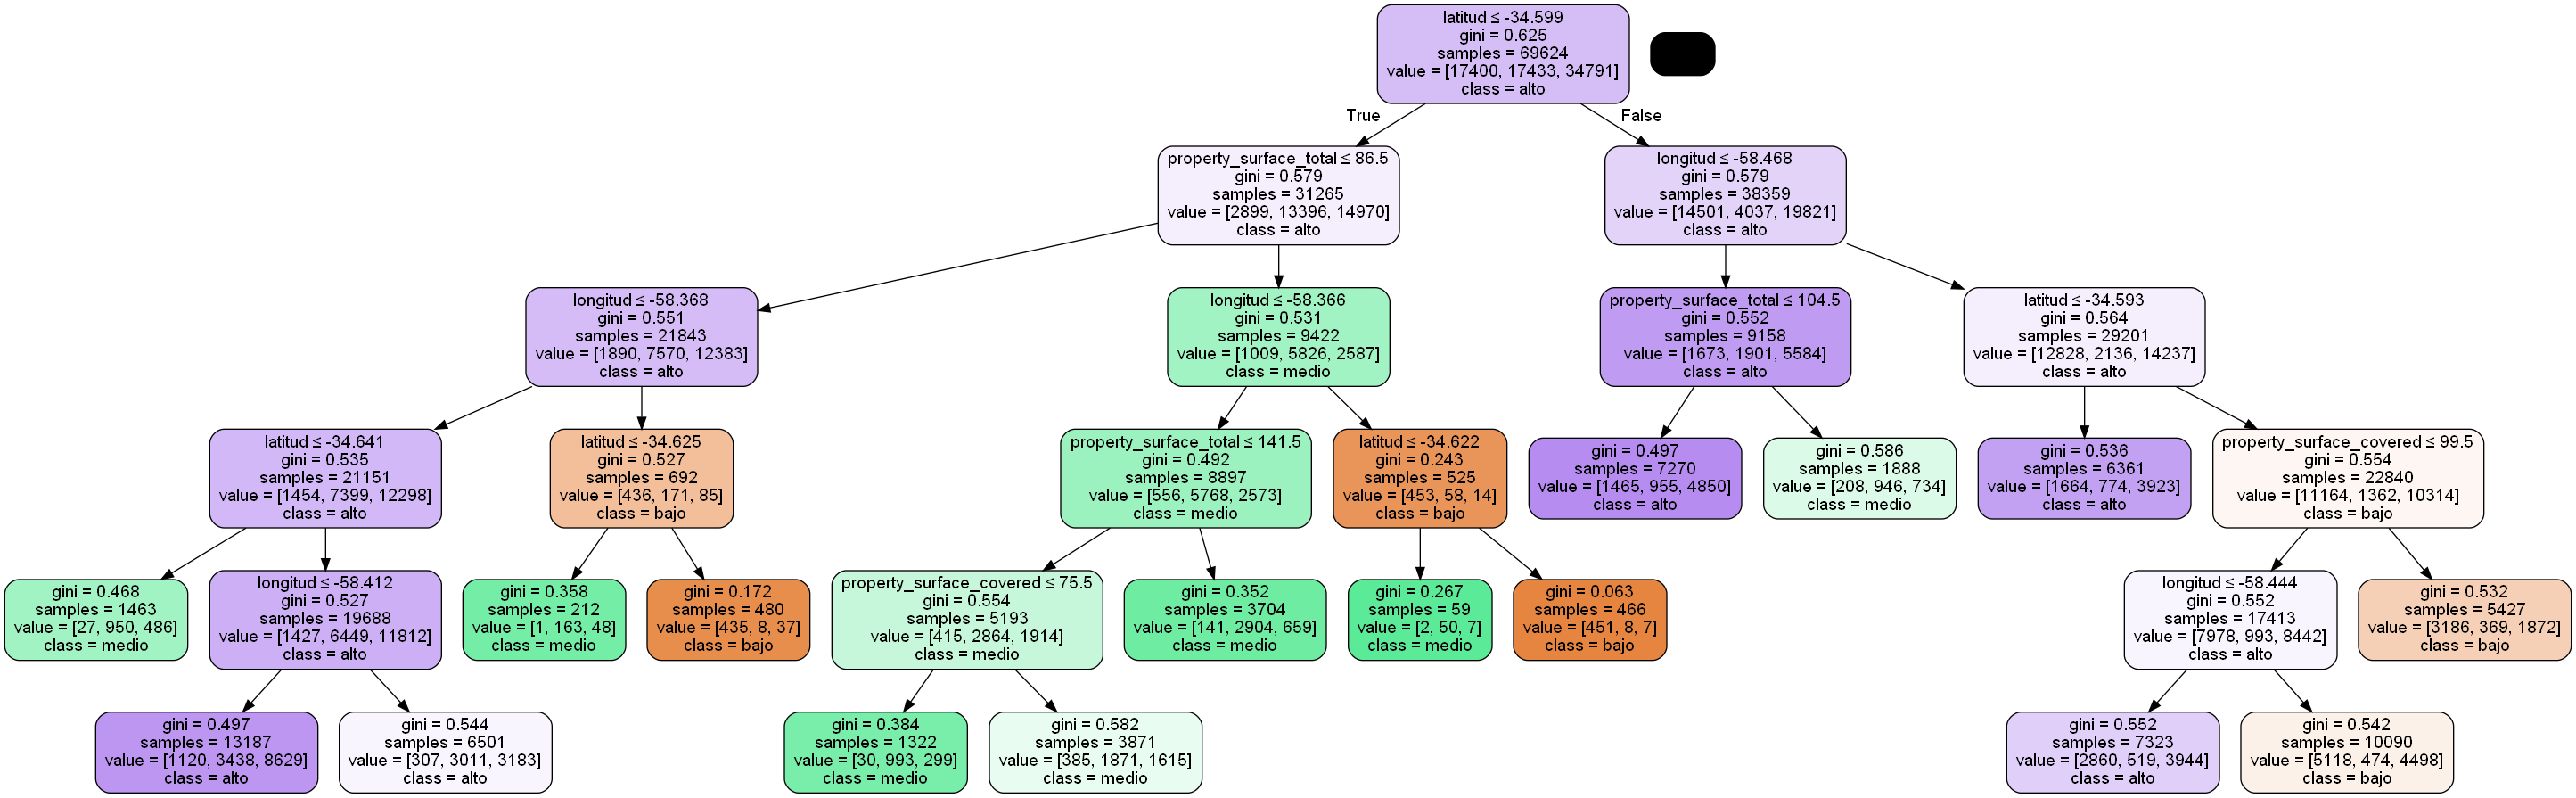

In [99]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

***explicacion***

F1-Score: 0.6018268512667317


Text(50.722222222222214, 0.5, 'True')

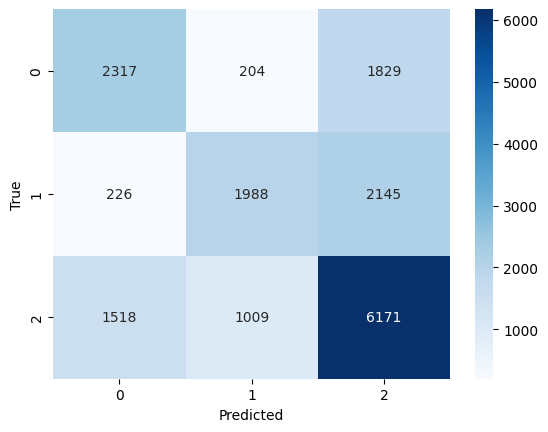

In [100]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest


In [101]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from scipy.stats import randint as sp_randInt

x_train, x_test, y_train, y_test = train_test_split(ds_clasificacion[features].values, 
                                                   ds_clasificacion[target].values, 
                                                   test_size=0.2,    #20% al conjunto de test
                                                   random_state=0,  #para poder reproducir el experimento
                                                   stratify=ds_clasificacion[target].values) #estratificado para mantener proporcion




#Cantidad de combinaciones que quiero porbar
n=4

#Conjunto de parámetros que quiero usar
#param_grid_rf = {'n_estimators': randint(4,200),'max_depth': [6,7,8], 'min_samples_split': uniform(0.01, 0.199) }


param_grid_rf = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': uniform(0.01, 0.199),
               'ccp_alpha':np.linspace(0,0.15,n), 
               'max_depth':list(range(5,6))}
                






#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree_rf = RandomForestClassifier()#n_estimators=648


#Metrica que quiero optimizar F1 Score
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, matthews_corrcoef, balanced_accuracy_score, accuracy_score
scorer_fn = make_scorer(f1_score, average='micro')

#scoring = {"roc_auc_score": new_auc, "recall": recall, "MCC" : mcc, 'Bal_acc' : bal_acc, "Accuracy": acc }

#scoring = {"roc_auc_score": auc_score, "recall": recall, "MCC" : mcc, 'Bal_acc' : bal_acc, "Accuracy": acc }
#Random Search Cross Validation
randomcv_rf = RandomizedSearchCV(estimator=base_tree_rf,
                              param_distributions = param_grid_rf,
                               cv=kfoldcv,
                            scoring = scorer_fn,
                            n_jobs=-1)
randomcv_rf.fit(x_train,y_train)


randomcv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=0.09697158346856956)

In [102]:
print(randomcv_rf.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 0.09697158346856956}


In [103]:
arbol_rf=DecisionTreeClassifier().set_params(**randomcv_rf.best_params_)

#Entreno el arbol en todo el set
arbol_rf.fit(x_train,y_train)

reglas_rf = export_text(arbol_rf, feature_names=list(features))

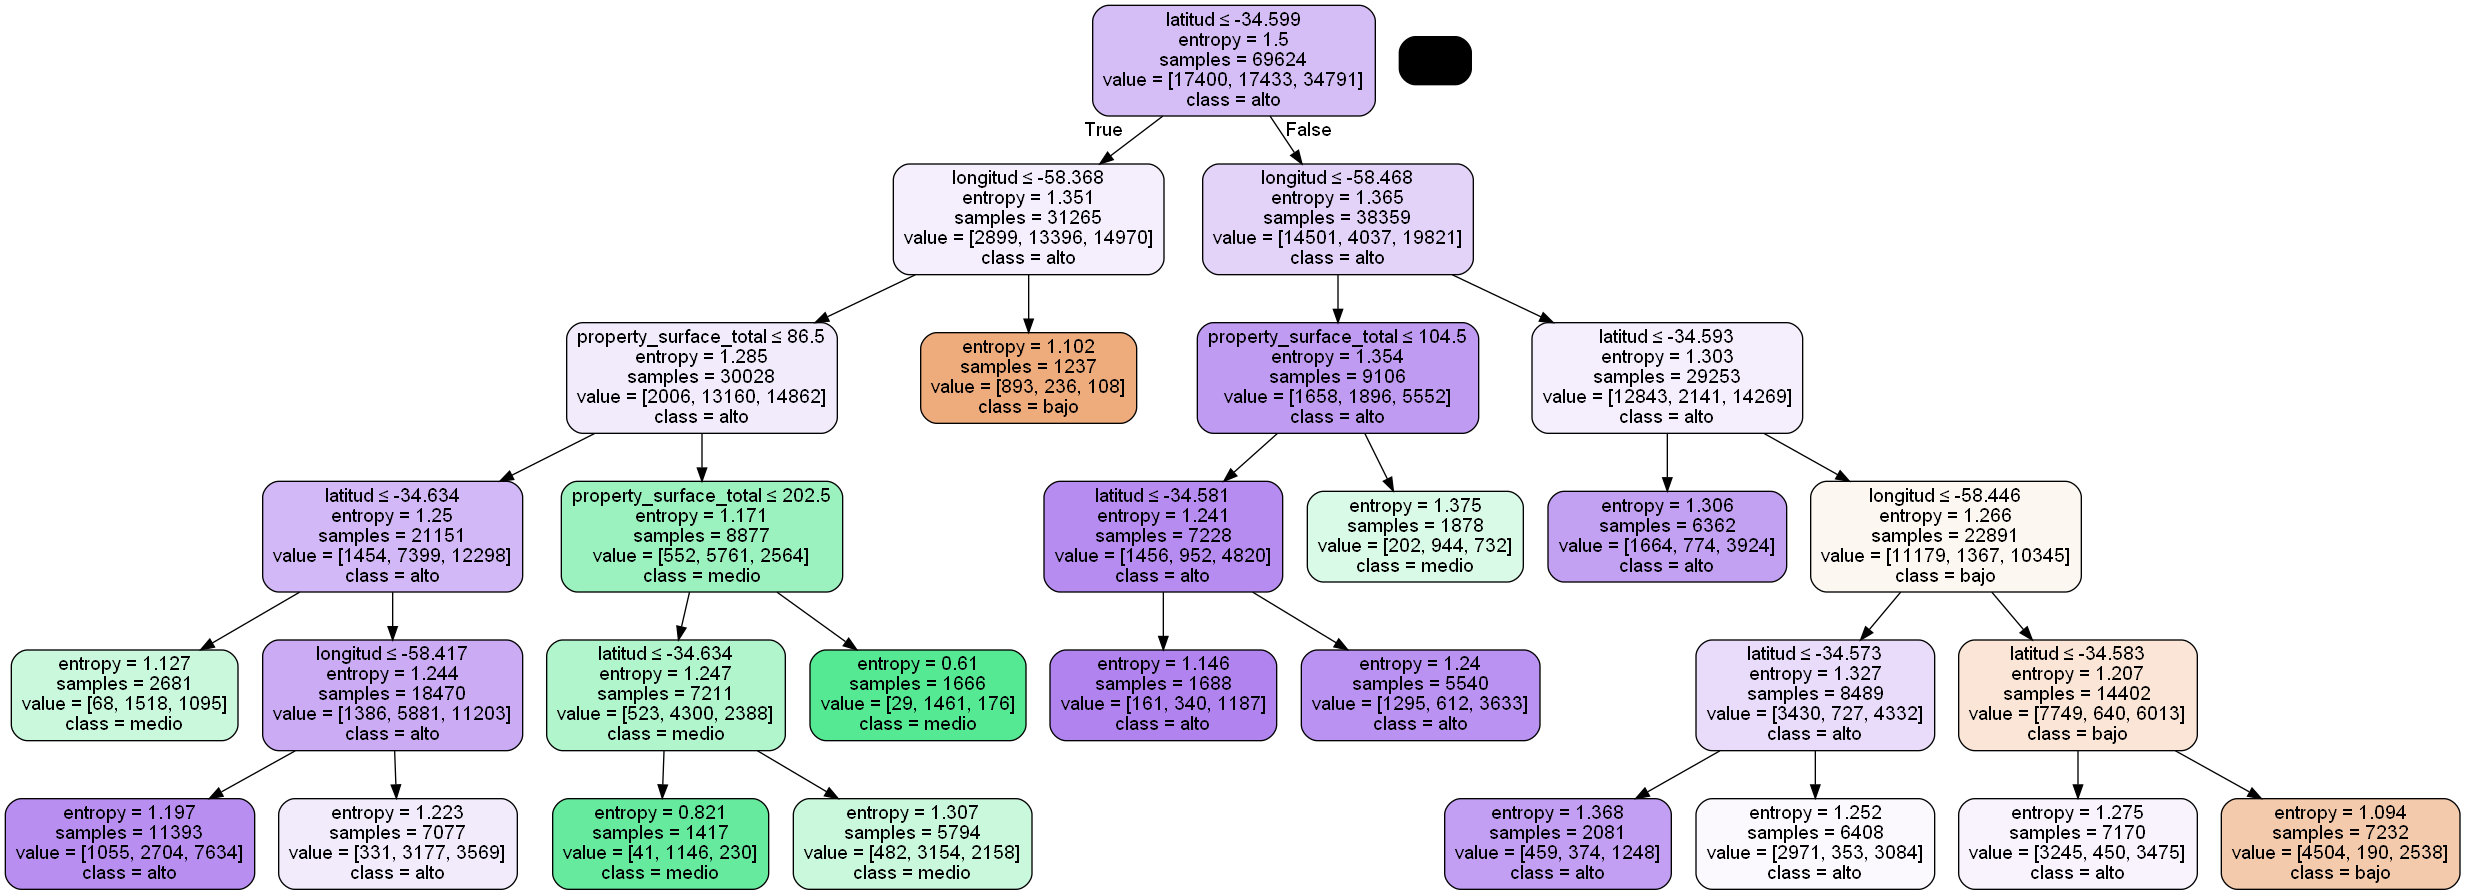

In [104]:
dot_data = StringIO()
export_graphviz(arbol_rf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

F1-Score: 0.5974607916355489


Text(50.722222222222214, 0.5, 'True')

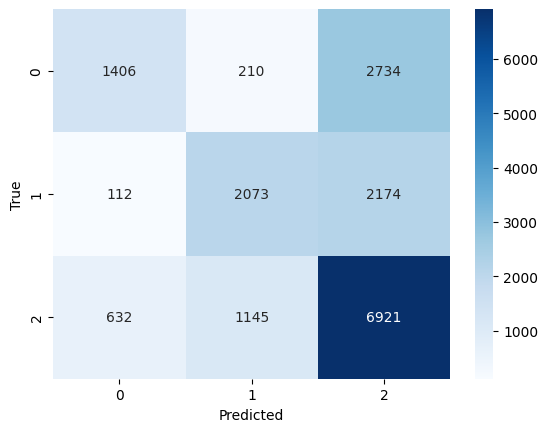

In [105]:
#Hago predicción sobre el set de evaluacion
y_pred= arbol_rf.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# KNneighborts

In [157]:
from sklearn.neighbors import KNeighborsClassifier

#Clasificador
knn=KNeighborsClassifier(n_neighbors=1)



knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=1)

In [158]:
y_pred_knn= knn.predict(x_test)

In [159]:
result = confusion_matrix(y_test, y_pred_knn)

Text(50.722222222222214, 0.5, 'True')

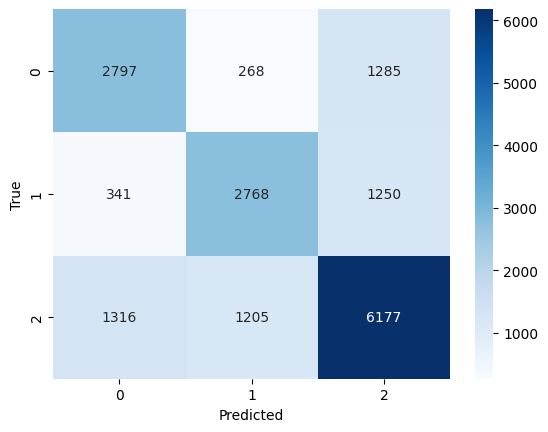

In [160]:
sns.heatmap(result, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [161]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred_knn, average='micro'))) #binary considera la clase positiva por defecto 1


F1-Score: 0.6745562130177515


In [194]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, x_train, y_train, cv=15)

In [197]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 35)}
#use gridsearch to test all values for n_neighbors
knn_2=KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_2, param_grid, cv=5)
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 1}

In [195]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.6702283684162691
